In [191]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.gaussian_process as gp



# Uploading the csv files


In [192]:
Data = pd.read_csv("C:\\Users\\saini\\Downloads\\new_casesWorld-India-2.csv")
Data

,Day,Date,World,India
0,1,31-12-2019,27,0
1,2,01-01-2020,0,0
2,3,02-01-2020,0,0
3,4,03-01-2020,17,0
4,5,04-01-2020,0,0
...,...,...,...,...
261,262,17-09-2020,291785,97894
262,263,18-09-2020,314666,96424
263,264,19-09-2020,309844,93337
264,265,20-09-2020,294862,92605


# Visualizing the no of cases in India and World with Day No. USING sns plot


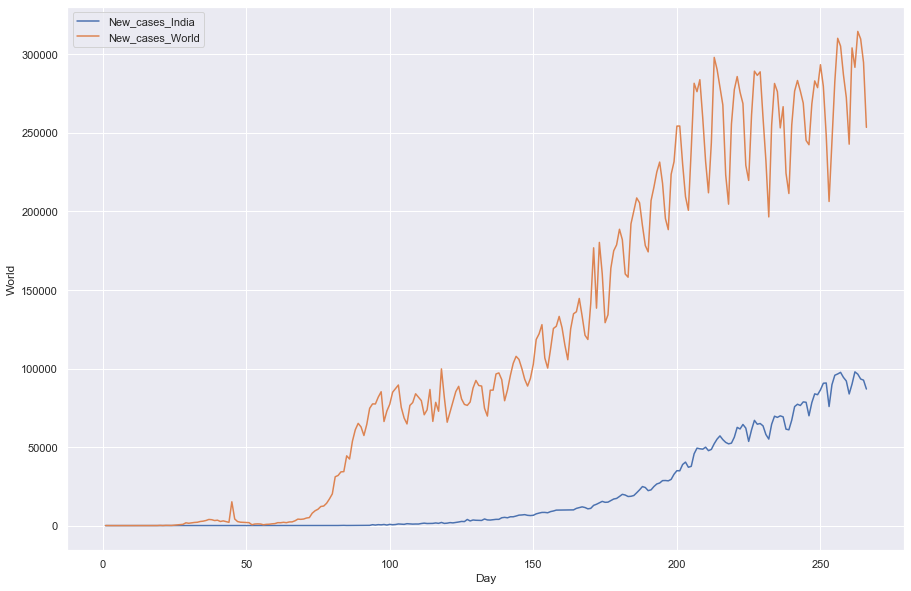

In [193]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Day",y = "India",data= Data , label = "New_cases_India")
sns.lineplot(x = "Day",y= "World",data = Data, label = "New_cases_World")
plt.show()


# no of cases in India increaing with Date feature

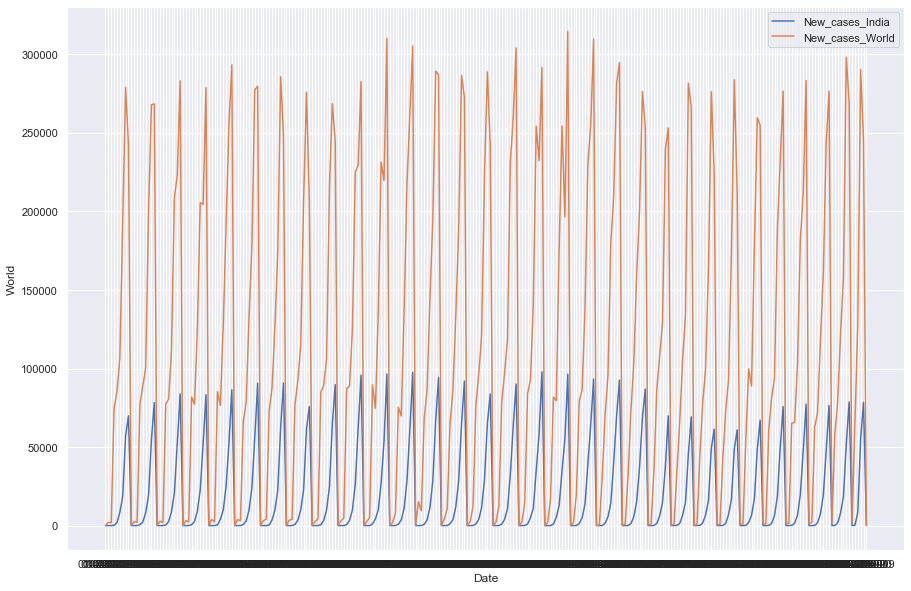

In [194]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Date",y = "India",data= Data , label = "New_cases_India")
sns.lineplot(x = "Date",y= "World",data = Data, label = "New_cases_World")
plt.show()


# Finding that is there any null value.

In [195]:
Data.isnull().sum()# as there is no null datapoints 

Day      0
Date     0
World    0
India    0
dtype: int64

# Finding the mean ,std, count using describe() 

In [196]:
Data.describe()

,Day,World,India
count,266.000000,266.000000,266.000000
mean,133.500000,116885.221805,20630.000000
std,76.931788,102960.334640,29427.430481
min,1.000000,0.000000,0.000000
25%,67.250000,4134.250000,2.000000
50%,133.500000,88755.000000,3663.000000
75%,199.750000,211794.750000,34336.750000
max,266.000000,314666.000000,97894.000000


# Input and output feature separating them and reshaping 1D to 2D

In [197]:
X = np.array(Data["Day"]).reshape(-1,1)    #INPUT FEATURE
Y = np.array(Data["India"]).reshape(-1,1)  #OUTPUT FEATURE
X.shape, Y.shape

((266, 1), (266, 1))

# IMPORT TRAIN_TEST SPLIT MODEL

In [198]:
from sklearn.model_selection import train_test_split


In [199]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2) #spliting the model for training and testing 

# Model Selection
Finding the value of kernal function 
Here, we will use the squared exponential kernel, also known as Gaussian kernel or RBF kernel
                  κ(xi,xj)=σ2fexp(−1\2l^2(xi−xj)T(xi−xj))
                  where k is kernel function ,σ2 is variance which is 0.1 ,l is the parameter , xi and xj are data points
                  

In [200]:
kernel = gp.kernels.ConstantKernel(0.1, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

# importing Gp using Scikit learn
There are several libraries for efficient implementation of Gaussian process regression, but we use here scikit which is simple 

In [201]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=False)

In [202]:
model.fit(x_train, y_train)
params = model.kernel_.get_params()
params

{'k1': 31.6**2,
 'k2': RBF(length_scale=1.42),
 'k1__constant_value': 999.9999999999998,
 'k1__constant_value_bounds': (0.1, 1000.0),
 'k2__length_scale': 1.416915275656033,
 'k2__length_scale_bounds': (0.001, 1000.0)}

# Prediction total no. of new cases in India

In [203]:
y_pred,std = model.predict(x_test,return_std=True)



In [204]:
MSE = ((y_pred-y_test)**2).mean()
MSE

6959978.868918566

# Prediction of  total no. of cases in World

In [206]:
X_W = np.array(Data["Day"]).reshape(-1,1)    #INPUT FEATURE
Y_W = np.array(Data["World"]).reshape(-1,1)  #OUTPUT FEATURE
X_W.shape, Y_W.shape

((266, 1), (266, 1))

# IMPORT TRAIN_TEST SPLIT MODEL

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2) #spliting the model for training and testing 

In [209]:
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

((212, 1), (212, 1), (54, 1), (54, 1))

# Model Selection
Finding the value of kernal function Here, we will use the squared exponential kernel, also known as Gaussian kernel or RBF kernel κ(xi,xj)=σ2fexp(−1\2l^2(xi−xj)T(xi−xj)) where k is kernel function ,σ2 is variance which is 0.1 ,l is the parameter , xi and xj are data points

In [210]:
kernel = gp.kernels.ConstantKernel(0.1, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [211]:
Model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=False)

In [212]:
model.fit(x_train, y_train)
params = model.kernel_.get_params()
params

{'k1': 31.6**2,
 'k2': RBF(length_scale=0.122),
 'k1__constant_value': 999.9999999999998,
 'k1__constant_value_bounds': (0.1, 1000.0),
 'k2__length_scale': 0.12166728640979199,
 'k2__length_scale_bounds': (0.001, 1000.0)}

In [213]:
Y_pred,std = model.predict(x_test,return_std=True)
Y_pred.shape

(54, 1)

In [214]:
MSE_W = ((Y_pred-Y_test)**2).mean()
MSE_W

1093391154.7962923

In [215]:
X = np.array(Data["Day"]).reshape(-1,1)    #INPUT FEATURE
Y = np.array(Data["India"]).reshape(-1,1)  #OUTPUT FEATURE
X.shape, Y.shape

((266, 1), (266, 1))